<a href="https://colab.research.google.com/github/deltorobarba/finance/blob/main/ews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Early Warning System (EWS)**

An early warning system (EWS) in finance can be designed to monitor financial risks, predict potential crises, or detect anomalies that may indicate adverse market conditions. These systems use financial indicators, statistical methods, and machine learning to flag warning signs early enough for preventive action.

One common approach in finance for EWS is to use logistic regression to predict the likelihood of default or crisis events based on historical data, or to use anomaly detection techniques to spot unusual patterns in financial metrics. Below is an example of how you might build a simple early warning system for financial distress or market anomalies using Python.

Early Warning System using Logistic Regression: This example builds a simple early warning system to predict financial distress using logistic regression based on some historical financial metrics such as debt-to-equity ratio, asset turnover, and interest coverage ratio.

For this example, we’ll assume you have a dataset with several financial indicators and a binary label that indicates whether a company went into financial distress (1) or not (0). If you don’t have data, you can simulate it as shown below.


Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       122
           1       0.00      0.00      0.00        28

    accuracy                           0.81       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.66      0.81      0.73       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


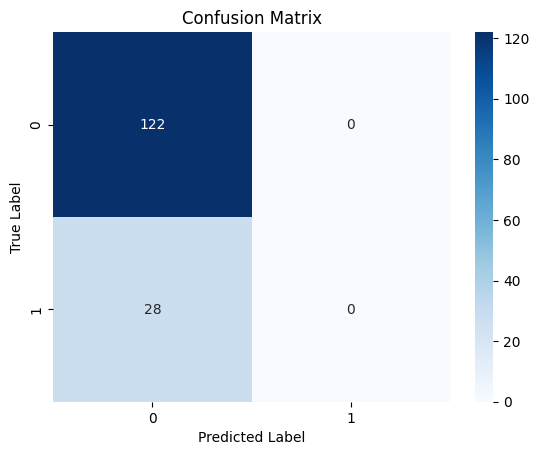

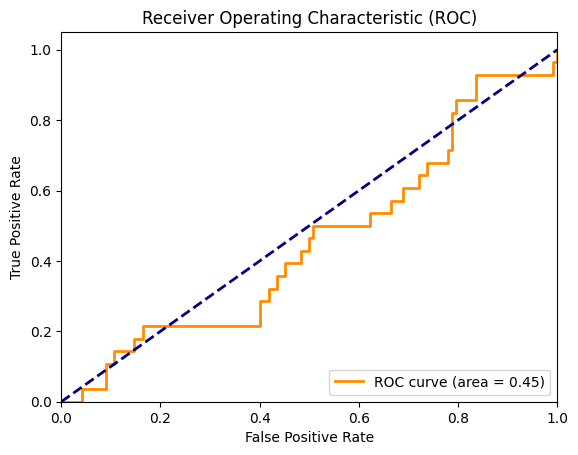

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Simulated dataset for financial distress (1 = distress, 0 = no distress)
np.random.seed(42)
n = 500
data = {
    'Debt_to_Equity': np.random.normal(2, 0.5, n),  # Debt to equity ratio
    'Asset_Turnover': np.random.normal(1, 0.2, n),  # Asset turnover ratio
    'Interest_Coverage': np.random.normal(5, 2, n),  # Interest coverage ratio
    'Financial_Distress': np.random.choice([0, 1], size=n, p=[0.85, 0.15])  # Binary target (distress or no distress)
}
df = pd.DataFrame(data)

# Split the data into training and test sets
X = df[['Debt_to_Equity', 'Asset_Turnover', 'Interest_Coverage']]
y = df['Financial_Distress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

1. **Data Simulation**:
   - The data includes three financial ratios: `Debt_to_Equity`, `Asset_Turnover`, and `Interest_Coverage`, which are commonly used in assessing financial distress.
   - `Financial_Distress` is a binary target variable that indicates whether a company experienced financial distress (`1`) or not (`0`). This is simulated here, but you would use actual historical data.

2. **Logistic Regression**:
   - We split the data into training and test sets, and train a logistic regression model using financial indicators as predictors.
   - The logistic regression model attempts to predict the probability of a company being in financial distress.

3. **Model Evaluation**:
   - We evaluate the model using a **confusion matrix**, which provides a summary of prediction accuracy by comparing predicted labels with true labels.
   - We also compute and plot the **ROC curve** and **AUC** (Area Under the Curve). The ROC curve helps visualize the trade-off between true positive and false positive rates, while the AUC score indicates the model's ability to distinguish between classes.

4. **Visualization**:
   - The confusion matrix heatmap provides a clear view of the classification performance.
   - The ROC curve helps assess the performance of the classifier across different thresholds.

Output:

- **Confusion Matrix**: Displays how many predictions were correct for both distress and no-distress companies.
- **ROC Curve**: The closer the curve is to the top-left corner, the better the model is at distinguishing between financial distress and non-distress.

Extending the Early Warning System:

1. **Feature Selection**: You can use more financial metrics (e.g., liquidity ratio, cash flow ratio) for better predictions.
2. **Machine Learning**: Instead of logistic regression, you can experiment with more advanced techniques such as Random Forest, Support Vector Machines (SVM), or even deep learning.
3. **Threshold Adjustments**: You can set custom thresholds for triggering an early warning, for example, based on the predicted probability of financial distress.
4. **Anomaly Detection**: You can also implement anomaly detection algorithms, such as Isolation Forest or One-Class SVM, to identify unusual patterns in financial time series data that may signal potential problems.


**Other types of risk indicators**